# Binary Classification

Last modification: 2017-10-16

In [1]:
# Load the iris dataset and randomly permute it
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

from mltoolbox.model_selection.classification import MultiClassifier

In this example, the breast cancer wisconsin dataset contains 569 samples and 30 features, details of the dataset can be find [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html "breast cancer wisconsin dataset").

In [2]:
# Load data
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target
n_samples, n_features = X.shape
print("samples:{}, features:{}".format(n_samples, n_features))

samples:569, features:30


This section is used to configure the classifiers that are going to be used in the classification, in this case, the *Support Vector Machines* [(SVC)](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) and *Random Forest* classifiers [(RF)](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) are going to be applied. The dictionary **models** is used to declare the classifiers and their parameters that are *NOT* going to be tunned in the cross-validation. The dictionary **model_params** is used to specify the parameters that *DO* will be tunned in the cross-validation. The dictionary  *cv_params* is used to configure how the [grid cross-validation](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) is going to be performed. 

In [3]:
# Configuration

random_state = 2017 # seed used by the random number generator

models = {
    # NOTE: SVC and RFC are the names that will be used to make reference to the models after the training step.
    'SVC': SVC(probability=True,
               random_state=random_state),
    'RFC': RandomForestClassifier(random_state=random_state)
}

model_params = {
    'SVC': {'kernel':['linear', 'rbf', 'sigmoid']},
    'RFC': {'n_estimators': [25,50, 75, 100]}
}

cv_params = {
    'cv': StratifiedKFold(n_splits=3, shuffle=False, random_state=random_state)
}

The *MultiClassifier* trains the multiple estimators previouly configured. First, the data is divided *n_splits* times, in this case in 5 folds using the [StratifiedKFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) class. As it is shown in the following table, the data is divided 5 times, four of the 5 blocks will be used for training (blue ones), while one will be used for testing (orange one). In addition, if the parameter *shuffle=True*, the data will be rearranged before splitting into blocks. 

<img src="./images/folds.png" alt="" height="250" width="250">

In [4]:
# Training
mc = MultiClassifier(n_splits=5, shuffle=True, random_state=random_state)

Second, the method *train()* receives the data, and the dictionaries with the configrations to compute the training. As an example the fold_1 is taken, it is divided in 3 parts to perform the cross-validation (specified in the dictionary *cv_params*). In the cross-validation, two parts are taken to tune the parameters of the classifiers, and one to test them. 

<img src="./images/cross-validation.png" alt="" height="250" width="250">

In [5]:
mc.train(X, y, models, model_params,  cv_params=cv_params)

Third, once that the best parameters were obtained, a model is generated from the training data. Following the example, this model is then tested on the fold_1:test block. As soon as the training and test were perfromed for each fold, the results can be visualized in a report.

In [6]:
# Results
print('RFC\n{}\n'.format(mc.report_score_summary_by_classifier('RFC')))
print('SVC\n{}\n'.format(mc.report_score_summary_by_classifier('SVC')))

RFC
               Accuracy Specificity  Precision     Recall   F1-score        AUC

          1      0.9478     1.0000     1.0000     0.9167     0.9565     0.9583
          2      0.9739     0.9302     0.9600     1.0000     0.9796     0.9651
          3      0.9735     0.9524     0.9722     0.9859     0.9790     0.9691
          4      0.9646     0.9048     0.9467     1.0000     0.9726     0.9524
          5      0.9469     0.8810     0.9333     0.9859     0.9589     0.9334

    Average      0.9613     0.9337     0.9624     0.9777     0.9693     0.9557


SVC
               Accuracy Specificity  Precision     Recall   F1-score        AUC

          1      0.9478     1.0000     1.0000     0.9167     0.9565     0.9583
          2      0.9652     0.9302     0.9595     0.9861     0.9726     0.9582
          3      0.9735     0.9286     0.9595     1.0000     0.9793     0.9643
          4      0.9735     0.9762     0.9857     0.9718     0.9787     0.9740
          5      0.9115     0.8095   

In order to analize an especific fold, you can obtaine the indices of the data used for training and testing, the model trained, as well as the prediction on the test data. The method best_estimator() has the parameter *fold_key*, if it is not set, the method returns the fold with the highest accuracy.

#### TODO: Use the measurement as a parameter to get the best estimator

In [7]:
# Get the results of the parition that has the high accuracy

fold, bm_model, bm_y_pred, bm_train_indices, bm_test_indices = mc.best_estimator('RFC')['RFC']

print(">>Best model in fold: {}".format(fold))
print(">>>Trained model \n{}".format(bm_model))
print(">>>Predicted labels: \n{}".format(bm_y_pred))
print(">>>Indices of the samples used for training: \n{}".format(bm_train_indices))
print(">>>Indices of samples used for predicting: \n{}".format(bm_test_indices))

>>Best model in fold: 2
>>>Trained model 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=2017, verbose=0,
            warm_start=False)
>>>Predicted labels: 
[0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 0]
>>>Indices of the samples used for training: 
[  0   1   2   3   4   5   6   7   8   9  10  13  14  15  16  17  19  20
  21  22  23  24  25  26  27  28  29  30  31  33  34  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  54  55  56  57  59  60
  62  63  65  6

In the case that you need to train the model again using the data of an especific fold, you can use the *bm_train_indices* and *bm_test_indices*.

In [8]:
# Recover the partition of the dataset based on the results of the best model
X_train_final, X_test_final = X[bm_train_indices], X[bm_test_indices]
y_train_final, y_test_final = y[bm_train_indices], y[bm_test_indices]

In [9]:
# Testing the best model using again all the training set
bm_model.fit(X_train_final, y_train_final)
print("Final score {0:.4f}".format(bm_model.score(X_test_final, y_test_final)))

Final score 0.9739


Also, the feature importances can be obtained if the algorithm has the option.

In [10]:
importances = mc.feature_importances('RFC')

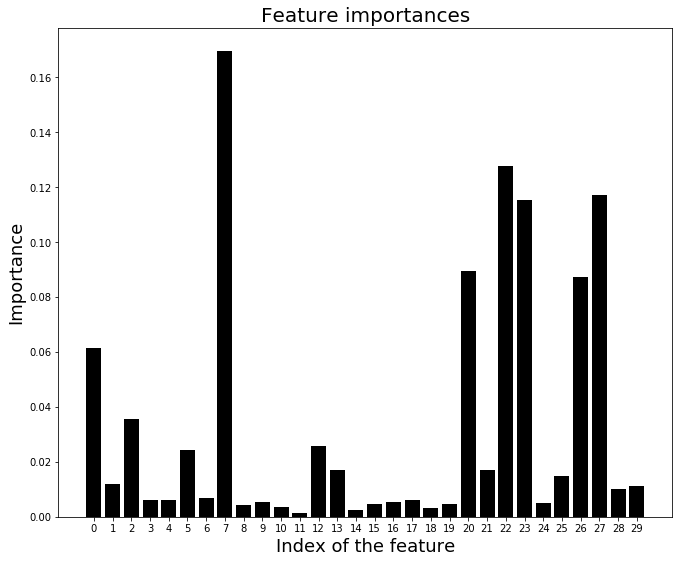

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

indices = range(n_features)
f, ax = plt.subplots(figsize=(11, 9))
plt.title("Feature importances", fontsize = 20)
plt.bar(indices, importances, color="black", align="center")

plt.xticks(indices)
plt.ylabel("Importance", fontsize = 18)
plt.xlabel("Index of the feature", fontsize = 18)